# EDA of AAPL Option Data

Process:
1. Extraction from CSV -> DF
2. DF -> DF Subsets on Strike PRice
3. EDA on Subsets
4. (Determine How to Proceed with Time Series Construction Based on EDA Findings)
5. Outline List of Potential Target Features
5. Outline Features to Engineer / Retain
6. Create code for feature engineering (entry by entry basis) (does not require 4. to complete)
7. EDA on different time series construction methods and the underlying data


## Extraction From CSV

In [8]:
import pandas as pd
import numpy as np


In [9]:
raw_data = pd.read_csv("aapl_2021_2023.csv", low_memory = False)

In [10]:
data_to_process = raw_data.copy()
data_to_process 

,QUOTE_UNIXTIME,QUOTE_READTIME,QUOTE_DATE,QUOTE_TIME_HOURS,UNDERLYING_LAST,EXPIRE_DATE,EXPIRE_UNIX,DTE,C_DELTA,C_GAMMA,...,P_LAST,P_DELTA,P_GAMMA,P_VEGA,P_THETA,P_RHO,P_IV,P_VOLUME,STRIKE_DISTANCE,STRIKE_DISTANCE_PCT
0,1680292800,2023-03-31 16:00,2023-03-31,16,164.84,2023-03-31,1680292800,0.00,0.85333,0.00007,...,0.01,-0.00027,0.00008,0.00046,-0.01042,0.00000,8.57103,0,114.8,0.697
1,1680292800,2023-03-31 16:00,2023-03-31,16,164.84,2023-03-31,1680292800,0.00,0.85842,0.00014,...,0.01,-0.00058,-0.00001,-0.00031,-0.01017,0.00000,7.89654,0,109.8,0.666
2,1680292800,2023-03-31 16:00,2023-03-31,16,164.84,2023-03-31,1680292800,0.00,0.86366,0.00024,...,0.01,-0.00064,0.00007,0.00005,-0.01035,0.00000,7.2873,0,104.8,0.636
3,1680292800,2023-03-31 16:00,2023-03-31,16,164.84,2023-03-31,1680292800,0.00,0.87044,0.00030,...,0.01,-0.00070,0.00004,0.00055,-0.01035,0.00000,6.73354,0,99.8,0.606
4,1680292800,2023-03-31 16:00,2023-03-31,16,164.84,2023-03-31,1680292800,0.00,0.87728,0.00032,...,0.01,0.00000,0.00005,0.00051,-0.00459,0.00000,5.86073,0,94.8,0.575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548158,1609794000,2021-01-04 16:00,2021-01-04,16,129.45,2023-03-17,1679083200,801.96,0.37473,0.00530,...,60.34,-0.61847,0.00472,0.70053,-0.01619,-2.25310,0.36035,2,50.6,0.391
548159,1609794000,2021-01-04 16:00,2021-01-04,16,129.45,2023-03-17,1679083200,801.96,0.35665,0.00524,...,64.25,-0.63373,0.00455,0.68652,-0.01532,-2.28713,0.36109,1,55.6,0.429
548160,1609794000,2021-01-04 16:00,2021-01-04,16,129.45,2023-03-17,1679083200,801.96,0.33848,0.00511,...,72.17,-0.65202,0.00436,0.66955,-0.01484,-2.31238,0.35836,8,60.6,0.468
548161,1609794000,2021-01-04 16:00,2021-01-04,16,129.45,2023-03-17,1679083200,801.96,0.32126,0.00505,...,75.8,-0.66113,0.00408,0.65691,-0.01437,-2.33111,0.36363,1,65.6,0.506


In [12]:
print(data_to_process.columns)

Index(['QUOTE_UNIXTIME', 'QUOTE_READTIME', 'QUOTE_DATE', 'QUOTE_TIME_HOURS',
       'UNDERLYING_LAST', 'EXPIRE_DATE', 'EXPIRE_UNIX', 'DTE', 'C_DELTA',
       'C_GAMMA', 'C_VEGA', 'C_THETA', 'C_RHO', 'C_IV', 'C_VOLUME', 'C_LAST',
       'C_SIZE', 'C_BID', 'C_ASK]', 'STRIKE', 'P_BID', 'P_ASK', 'P_SIZE',
       'P_LAST', 'P_DELTA', 'P_GAMMA', 'P_VEGA', 'P_THETA', 'P_RHO', 'P_IV',
       'P_VOLUME', 'STRIKE_DISTANCE', 'STRIKE_DISTANCE_PCT'],
      dtype='object')


In [6]:
# Load CSV with low_memory=False to avoid chunk-based type inference
# 
# # Efficient way to count unique data types in each column
# def get_dtype_counts(df):
#     type_counts = df.applymap(type).agg(lambda x: x.value_counts().to_dict())
#     return type_counts
# 
# # Apply to the DataFrame and display results
# dtype_counts = get_dtype_counts(data_to_process)
# # dtype_counts


C:\Users\qu20523\AppData\Local\Temp\ipykernel_18696\3278970098.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  type_counts = df.applymap(type).agg(lambda x: x.value_counts().to_dict())


In [13]:
# Group By Expiry Date and Strike Price  

In [14]:
# Group by Expiry Date and Strike Price
grouped = raw_data.groupby(['EXPIRE_DATE', 'STRIKE'])


In [15]:
# Create a dictionary where keys are (EXPIRE_DATE, STRIKE) tuples
grouped_dfs = {key: group for key, group in grouped}

# Example: Accessing a specific group (replace with actual values)
# example_group = grouped_dfs.get(("2023-09-15", 150.0))  # Example expiry date and strike price



        QUOTE_UNIXTIME     QUOTE_READTIME  QUOTE_DATE  QUOTE_TIME_HOURS  \
628         1680292800   2023-03-31 16:00  2023-03-31                16   
1792        1680206400   2023-03-30 16:00  2023-03-30                16   
2926        1680120000   2023-03-29 16:00  2023-03-29                16   
4060        1680033600   2023-03-28 16:00  2023-03-28                16   
5194        1679947200   2023-03-27 16:00  2023-03-27                16   
...                ...                ...         ...               ...   
407754      1627329600   2021-07-26 16:00  2021-07-26                16   
408663      1627070400   2021-07-23 16:00  2021-07-23                16   
409572      1626984000   2021-07-22 16:00  2021-07-22                16   
410455      1626897600   2021-07-21 16:00  2021-07-21                16   
411338      1626811200   2021-07-20 16:00  2021-07-20                16   

        UNDERLYING_LAST EXPIRE_DATE  EXPIRE_UNIX    DTE  C_DELTA  C_GAMMA  \
628              164.8

In [21]:
list_of_days_of_data = []
strike_prices = []
expiry_dates = []
for (expire_date, strike), group_df in grouped:
    if len(group_df) == 31:
        print(f"Group: Expiry Date = {expire_date}, Strike = {strike}, {len(group_df)}")
        list_of_days_of_data.append(len(group_df))
        strike_prices.append(strike)
        expiry_dates.append(expire_date)


Group: Expiry Date = 2021-03-05, Strike = 118.0, 31
Group: Expiry Date = 2021-03-05, Strike = 119.0, 31
Group: Expiry Date = 2021-03-05, Strike = 120.0, 31
Group: Expiry Date = 2021-03-05, Strike = 121.0, 31
Group: Expiry Date = 2021-03-05, Strike = 122.0, 31
Group: Expiry Date = 2021-03-05, Strike = 123.0, 31
Group: Expiry Date = 2021-03-05, Strike = 124.0, 31
Group: Expiry Date = 2021-03-05, Strike = 125.0, 31
Group: Expiry Date = 2021-03-05, Strike = 126.0, 31
Group: Expiry Date = 2021-03-05, Strike = 127.0, 31
Group: Expiry Date = 2021-03-05, Strike = 128.0, 31
Group: Expiry Date = 2021-03-05, Strike = 129.0, 31
Group: Expiry Date = 2021-03-05, Strike = 130.0, 31
Group: Expiry Date = 2021-03-05, Strike = 131.0, 31
Group: Expiry Date = 2021-03-05, Strike = 132.0, 31
Group: Expiry Date = 2021-03-05, Strike = 133.0, 31
Group: Expiry Date = 2021-03-05, Strike = 134.0, 31
Group: Expiry Date = 2021-03-05, Strike = 135.0, 31
Group: Expiry Date = 2021-03-05, Strike = 136.0, 31
Group: Expir

(array([  8.,  30.,  77., 200., 288.,  86.,  67.,  42.,  42.,  38.]),
 array([ 55. ,  74.5,  94. , 113.5, 133. , 152.5, 172. , 191.5, 211. ,
        230.5, 250. ]),
 <BarContainer object of 10 artists>)

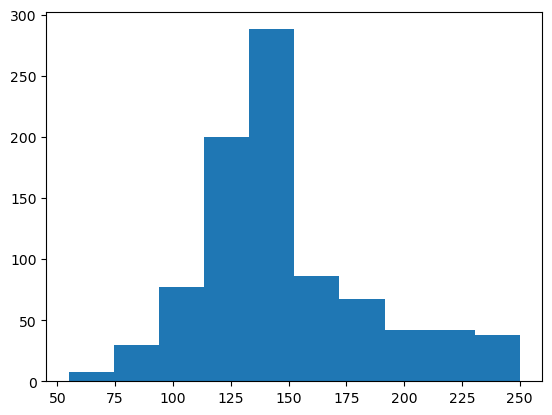

In [25]:
import matplotlib.pyplot as plt
plt.hist(strike_prices)

In [ ]:
## Constructing collections of distinct time series length containing groups of expiry date strike price


In [ ]:
example_group = grouped_dfs.get(("2023-09-", 150.0))  # Example expiry date and strike price